In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

# Load Figure 12 Dataset 1
This means only the height is variable.

Datapoint 79534
Label False


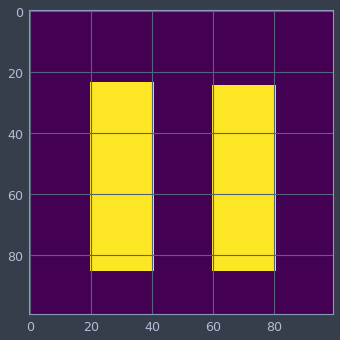

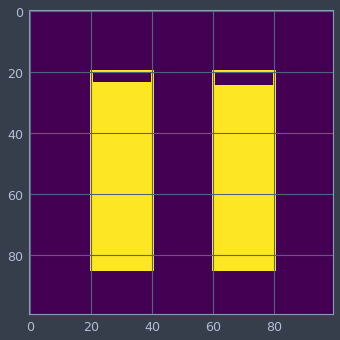

In [3]:
images, framed_images, labels = C.Figure12.load(dataset=1)

In [4]:
import keras.applications

Using TensorFlow backend.


In [5]:
classifier = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

In [6]:
classifier.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 49, 49, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 49, 49, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [9]:
classifier.output_shape

(None, 3, 3, 2048)

In [8]:
t0 = time.time()

stacked_images = np.stack((images,)*3, -1)
features = classifier.predict(stacked_images, verbose=True)

feature_time = time.time() - t0

100000/100000 [==============================] - 208s 2ms/step


In [14]:
from sklearn.model_selection import RepeatedStratifiedKFold 
from keras import models
from keras import layers
from keras import optimizers
from keras.utils.np_utils import to_categorical
import time

In [19]:
oshape = classifier.output_shape

kfold = RepeatedStratifiedKFold(n_splits=2, n_repeats=2)

X = features.reshape(images.shape[0], oshape[1]*oshape[2]*oshape[3])
y = labels

results = []

for train, test in kfold.split(X, y):

  t0 = time.time()
  
  MLP = models.Sequential()
  MLP.add(layers.Dense(256, activation='relu', input_dim=oshape[1]*oshape[2]*oshape[3]))
  MLP.add(layers.Dropout(0.5))
  MLP.add(layers.Dense(2, activation='softmax'))

  MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

  history = MLP.fit(X[train], \
                    to_categorical(y[train]), \
                    epochs=1, \
                    batch_size=32, \
                    validation_split=0.25,
                    verbose=True)

  scores = MLP.evaluate(X[test], to_categorical(y[test]), verbose=True)

  stats = dict(history.history)

  stats['test_loss'] = scores[0]
  stats['test_acc'] = scores[1]

  fit_time = time.time() - t0
  stats['time'] = feature_time + fit_time
  
  results.append(stats)

Train on 37500 samples, validate on 12500 samples
Epoch 1/1
50000/50000 [==============================] - 5s 105us/step
Train on 37500 samples, validate on 12500 samples
Epoch 1/1
50000/50000 [==============================] - 5s 105us/step
Train on 37500 samples, validate on 12500 samples
Epoch 1/1
50000/50000 [==============================] - 5s 105us/step
Train on 37500 samples, validate on 12500 samples
Epoch 1/1
50000/50000 [==============================] - 5s 106us/step


In [20]:
results

[{'acc': [0.94458666667938229],
  'loss': [0.14966572581688564],
  'test_acc': 1.0,
  'test_loss': 0.0098975340308248994,
  'val_acc': [1.0],
  'val_loss': [0.0097077779179811485]},
 {'acc': [0.95240000001271563],
  'loss': [0.13122183379530908],
  'test_acc': 1.0,
  'test_loss': 0.0035194667821377514,
  'val_acc': [1.0],
  'val_loss': [0.0036107776790857316]},
 {'acc': [0.87712000000635781],
  'loss': [0.36138493818600975],
  'test_acc': 1.0,
  'test_loss': 0.10991272978544235,
  'val_acc': [1.0],
  'val_loss': [0.11055098359107972]},
 {'acc': [0.95842666667938237],
  'loss': [0.12632367091576258],
  'test_acc': 1.0,
  'test_loss': 0.0086736790321767336,
  'val_acc': [1.0],
  'val_loss': [0.0086979317426681517]}]

In [ ]:
str(True)